In [ ]:
!pip install tensorflow tensorflow-datasets

In [ ]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt




def get_generator():
    model = models.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(32, (2, 2), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())


    model.add(layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (3, 3), strides=(1, 1), padding='same', use_bias=False, activation='relu'))
    print(model.output_shape)

    return model



In [ ]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load MNIST dataset with 80% for training and 20% for validation


def get_discriminator():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Final layer with sigmoid activation
    return model



Num GPUs Available:  1
Num CPUs Available:  1
(None, 28, 28, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:707: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


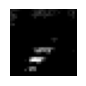

Time for epoch 1 is 50.438854694366455 sec


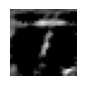

Time for epoch 2 is 38.94057583808899 sec


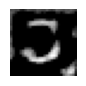

Time for epoch 3 is 39.2683219909668 sec


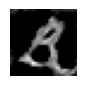

Time for epoch 4 is 39.13043475151062 sec


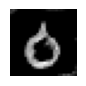

Time for epoch 5 is 39.084261417388916 sec


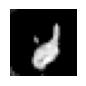

Time for epoch 6 is 39.13620138168335 sec


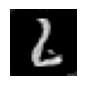

Time for epoch 7 is 39.14868450164795 sec


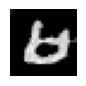

Time for epoch 8 is 39.087733030319214 sec


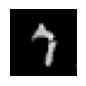

Time for epoch 9 is 39.06440997123718 sec


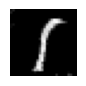

Time for epoch 10 is 39.113412857055664 sec


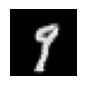

Time for epoch 11 is 39.121497631073 sec


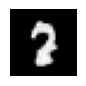

Time for epoch 12 is 39.13737177848816 sec


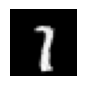

Time for epoch 13 is 39.13539719581604 sec


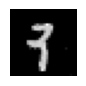

Time for epoch 14 is 39.12050986289978 sec


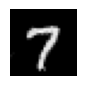

Time for epoch 15 is 39.332481384277344 sec


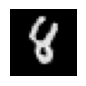

Time for epoch 16 is 39.059683322906494 sec


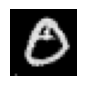

Time for epoch 17 is 39.10319495201111 sec


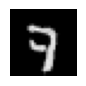

Time for epoch 18 is 39.08559608459473 sec


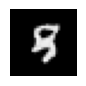

Time for epoch 19 is 39.23100256919861 sec


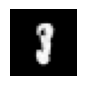

Time for epoch 20 is 40.24672317504883 sec


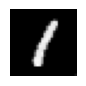

Time for epoch 21 is 39.255120515823364 sec


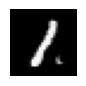

Time for epoch 22 is 39.04658555984497 sec


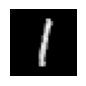

Time for epoch 23 is 39.07577157020569 sec


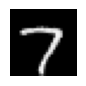

Time for epoch 24 is 39.143776655197144 sec


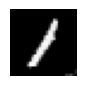

Time for epoch 25 is 39.15558457374573 sec


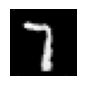

Time for epoch 26 is 39.1058292388916 sec


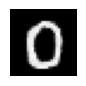

Time for epoch 27 is 39.0931658744812 sec


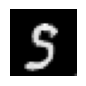

Time for epoch 28 is 39.10969138145447 sec


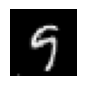

Time for epoch 29 is 39.25868582725525 sec


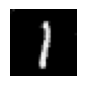

Time for epoch 30 is 41.25912022590637 sec


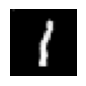

Time for epoch 31 is 39.313918113708496 sec


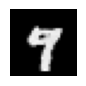

Time for epoch 32 is 39.2108314037323 sec


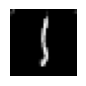

Time for epoch 33 is 39.02256917953491 sec


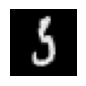

Time for epoch 34 is 39.05014753341675 sec


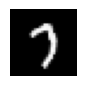

Time for epoch 35 is 39.11061334609985 sec


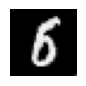

Time for epoch 36 is 39.495930433273315 sec


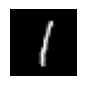

Time for epoch 37 is 39.06731605529785 sec


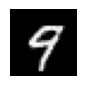

Time for epoch 38 is 39.1136314868927 sec


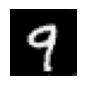

Time for epoch 39 is 39.049635887145996 sec


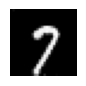

Time for epoch 40 is 39.04530358314514 sec


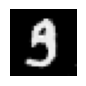

Time for epoch 41 is 39.087366819381714 sec


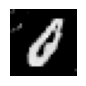

Time for epoch 42 is 39.11215376853943 sec


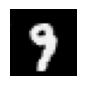

Time for epoch 43 is 39.06606316566467 sec


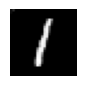

Time for epoch 44 is 39.07970476150513 sec


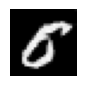

Time for epoch 45 is 39.29670190811157 sec


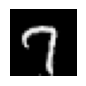

Time for epoch 46 is 39.06357192993164 sec


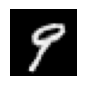

Time for epoch 47 is 39.101897954940796 sec


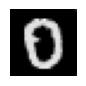

Time for epoch 48 is 39.00108456611633 sec


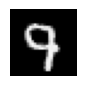

Time for epoch 49 is 39.014774799346924 sec


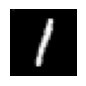

Time for epoch 50 is 39.06660866737366 sec


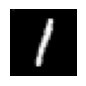

'./training_checkpoints/ckpt-4'

In [ ]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import os
import time
train_ds = tfds.load('mnist', split='train', shuffle_files=True)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'  # Set to 2 for minimal logs
tf.debugging.set_log_device_placement(True)


import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))
def preprocess(data):
    image = tf.cast(data['image'], tf.float32) / 255.0  # Normalize to [0, 1]
    label = data['label']
    return image, label

train_ds = train_ds.map(preprocess).shuffle(1000).batch(100).prefetch(tf.data.AUTOTUNE)
generator = get_generator()
discriminator = get_discriminator()

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 100

@tf.function
def train_step(images):
    noise = tf.random.normal([100, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4,4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, 16)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        noise = tf.random.normal([100, noise_dim])
        for image_batch in dataset:
            train_step(image_batch)

        generate_and_save_images(generator, epoch + 1, noise)

        if (epoch + 1) % 15 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

    generator.save('generator.keras')
    discriminator.save('discriminator.keras')

    generate_and_save_images(generator, epochs, noise)


train(train_ds, EPOCHS)
checkpoint.save(file_prefix = checkpoint_prefix)

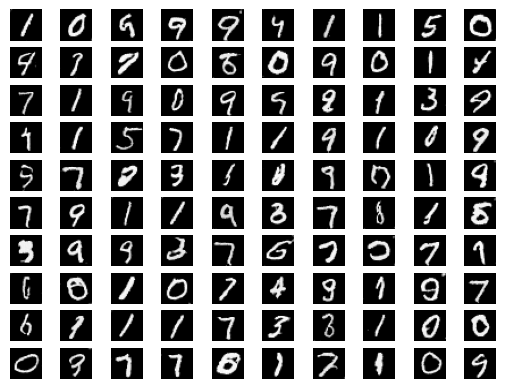

In [49]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import os
import time


generator = models.load_model('./generator.keras')
discriminator = models.load_model('./discriminator.keras')


noise = tf.random.normal([100, 100])
predictions = generator(noise, training=False)
for i in range(len(predictions)):
    plt.subplot(10, 10, i + 1)
    plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
    plt.axis('off')

plt.show()



